<a href="https://colab.research.google.com/github/JatinKrRana/AlmaBetter-Capstone_Projects/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Jatin Kumar Rana


# **Project Summary -**

**Introduction:**

The Zomato Restaurant Clustering and Sentiment Analysis project aim to leverage unsupervised machine learning techniques to extract valuable insights from the vast amount of user-generated data on the Zomato platform. Zomato, a popular online restaurant discovery and food delivery platform, accumulates a diverse set of reviews and ratings from users worldwide. The primary objectives of this project are to cluster restaurants based on various features and perform sentiment analysis on user reviews, providing a comprehensive understanding of the dining landscape.

**Data Collection and Preprocessing:**

The first step involves gathering data from the Zomato API, which provides detailed information about restaurants, including their location, cuisine, cost, user ratings, and reviews. The data undergoes thorough preprocessing to handle missing values, eliminate duplicates, and convert categorical variables into a suitable format for analysis. Additionally, text data preprocessing techniques such as tokenization, stemming, and removal of stop words are applied to enhance the quality of textual information.

**Feature Engineering:**

To facilitate clustering, relevant features are selected, including restaurant location, cuisine type, cost, and average user ratings. Additionally, text-based features such as sentiment scores extracted from reviews are incorporated. Feature scaling and normalization are performed to ensure that all features contribute equally to the clustering process.

**Clustering Analysis:**

Unsupervised machine learning algorithms like k-means clustering are applied to group restaurants with similar characteristics into distinct clusters. The optimal number of clusters is determined using techniques like the elbow method or silhouette analysis. The resulting clusters provide insights into the diverse culinary landscape, enabling users and businesses to identify patterns and trends within the restaurant data.

**Sentiment Analysis:**

Sentiment analysis is conducted on user reviews to assess the overall sentiment associated with each restaurant. Natural Language Processing (NLP) techniques, such as the use of sentiment lexicons or machine learning models like Support Vector Machines (SVM) or recurrent neural networks (RNN), are employed to classify reviews as positive, negative, or neutral. This analysis offers valuable information about customer satisfaction and the factors influencing their opinions.

**Visualization:**

The clustered restaurants and sentiment analysis results are visualized using charts, graphs, and maps. Geographic maps can display the distribution of restaurant clusters across different regions, while bar charts and word clouds help illustrate sentiment distribution and common themes in user reviews. These visualizations make it easier for users and stakeholders to grasp the trends and patterns uncovered by the analysis.

**Insights and Recommendations:**

The project concludes with the extraction of actionable insights and recommendations for Zomato users, restaurant owners, and the platform itself. Users can benefit from discovering new restaurants within specific clusters that match their preferences. Restaurant owners can gain insights into the factors influencing customer satisfaction and adjust their strategies accordingly. Zomato can utilize the findings to enhance user experience, improve recommendation algorithms, and refine the overall platform.

In conclusion, the Zomato Restaurant Clustering and Sentiment Analysis project harnesses the power of unsupervised machine learning to uncover meaningful patterns in restaurant data. By clustering restaurants and analyzing user sentiments, the project delivers valuable insights that can enhance the dining experience for both users and restaurant owners, contributing to the continual improvement of the Zomato platform.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the dynamic landscape of online restaurant platforms, Zomato faces the challenge of efficiently organizing and extracting valuable insights from the vast array of user-generated data. The abundance of information, including restaurant details, user reviews, and ratings, poses a significant opportunity for enhancement. The challenge at hand is to develop an unsupervised machine learning solution that clusters restaurants based on diverse features and performs sentiment analysis on user reviews. This solution aims to provide a nuanced understanding of the culinary landscape, assisting users in making informed dining choices and empowering restaurant owners to tailor their offerings to meet customer expectations. The primary goal is to harness the potential of unsupervised learning to uncover patterns and sentiments within the data, ultimately contributing to an improved and more personalized experience for Zomato users and a more data-driven approach for restaurant owners and the Zomato platform itself.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [440]:
# Import Libraries
import pandas as pd
import numpy as np
# from numpy import unique
from numpy import math

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# pd.set_option('desplay.max_columns',None)

import datetime

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from wordcloud import WordCloud

import re
import spacy

!pip install contractions
import contractions

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch

### Dataset Loading

In [441]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [442]:
zom_rest_name_df = pd.read_csv('/content/drive/MyDrive/Project_csv_Datasets/Zomato Restaurant names and Metadata.csv')
zom_rest_review_df = pd.read_csv('/content/drive/MyDrive/Project_csv_Datasets/Zomato Restaurant reviews.csv')

### Dataset First View

In [443]:
zom_rest_name_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [444]:
zom_rest_review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [445]:
# Rows & Columns count in 'Restaurant name' dataset
no_of_row = zom_rest_name_df.shape[0]
no_of_col = zom_rest_name_df.shape[1]

print(f"Number of rows in zom_rest_name_df = {no_of_row} \nNumber of columns in zom_rest_name_df = {no_of_col}")

Number of rows in zom_rest_name_df = 105 
Number of columns in zom_rest_name_df = 6


In [446]:
# Rows & Columns count in 'Restaurant review' dataset
no_of_row = zom_rest_review_df.shape[0]
no_of_col = zom_rest_review_df.shape[1]

print(f"Number of rows in zom_rest_review_df = {no_of_row} \nNumber of columns in zom_rest_review_df = {no_of_col}")

Number of rows in zom_rest_review_df = 10000 
Number of columns in zom_rest_review_df = 7


### Dataset Information

In [447]:
# Dataset Info
zom_rest_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [448]:
zom_rest_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [449]:
# Calculating the number of duplicate values in each column of the Restaurant Name dataset
num_of_dup = zom_rest_name_df.apply(lambda x: x.duplicated().sum())
print(f'Number of Duplicate Values in Each Column:\n{num_of_dup}')

# Calculating duplicate rows in the Restaurant Name dataset
print(f'\nNumber of Duplicate row in the dataset is:{zom_rest_name_df.duplicated().sum()}')

Number of Duplicate Values in Each Column:
Name            0
Links           0
Cost           76
Collections    62
Cuisines       13
Timings        27
dtype: int64

Number of Duplicate row in the dataset is:0


In [450]:
# Calculating the number of duplicate values in each column of the Restaurant Review dataset
num_of_dup = zom_rest_review_df.apply(lambda x: x.duplicated().sum())
print(f'Number of Duplicate Values in Each Column:\n{num_of_dup}')

# Calculating duplicate rows in the Restaurant Review dataset
print(f'\nNumber of Duplicate row in the dataset is:{zom_rest_review_df.duplicated().sum()}')

Number of Duplicate Values in Each Column:
Restaurant    9900
Reviewer      2553
Review         635
Rating        9989
Metadata      7522
Time           217
Pictures      9964
dtype: int64

Number of Duplicate row in the dataset is:36


#### Missing Values/Null Values

In [451]:
# Count the Missing Values/Null Values in the whole 'Restaurant Name' dataframe
null_value_count_1 = zom_rest_name_df.isnull().sum().sum()
print(f"Number of null values in the zom_rest_name dataframe is {null_value_count_1}.\n")

# Count the Missing Values/Null Values in each column
bool_df = zom_rest_name_df.isnull()
column_name_list = list(zom_rest_name_df.columns)
null_value_list = []

for i in column_name_list:
    null_value = (bool_df[i] == True).sum()
    null_value_list.append(null_value)

null_value_count_col_1 = pd.DataFrame({'Column Name': column_name_list, 'Null Value Count': null_value_list})
print(null_value_count_col_1)

Number of null values in the zom_rest_name dataframe is 55.

   Column Name  Null Value Count
0         Name                 0
1        Links                 0
2         Cost                 0
3  Collections                54
4     Cuisines                 0
5      Timings                 1


In [452]:
# Count the Missing Values/Null Values in the whole 'Restaurant Review' dataframe
null_value_count_2 = zom_rest_review_df.isnull().sum().sum()
print(f"Number of null values in the zom_rest_review dataframe is {null_value_count_2}.\n")

# Count the Missing Values/Null Values in each column
bool_df = zom_rest_review_df.isnull()
column_name_list = list(zom_rest_review_df.columns)
null_value_list = []

for i in column_name_list:
    null_value = (bool_df[i] == True).sum()
    null_value_list.append(null_value)

null_value_count_col_2 = pd.DataFrame({'Column Name': column_name_list, 'Null Value Count': null_value_list})
print(null_value_count_col_2)

Number of null values in the zom_rest_review dataframe is 197.

  Column Name  Null Value Count
0  Restaurant                 0
1    Reviewer                38
2      Review                45
3      Rating                38
4    Metadata                38
5        Time                38
6    Pictures                 0


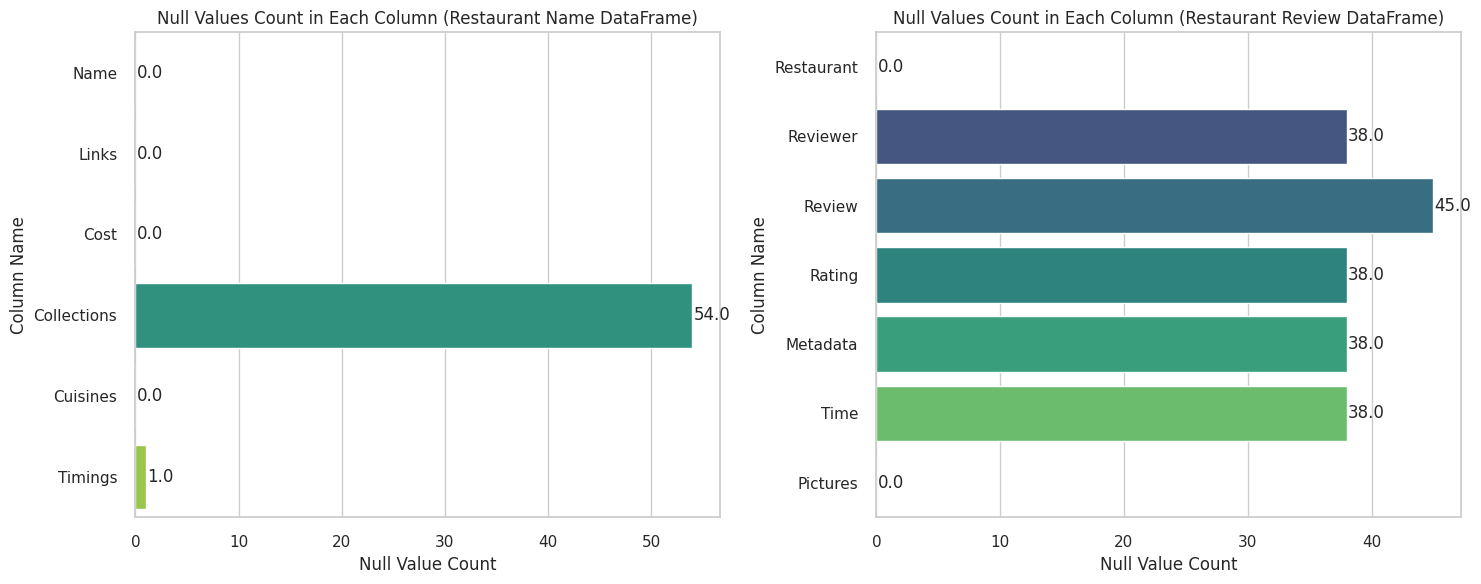

In [453]:
# Visualizing the missing values
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the null values count for each column in the 'zom_rest_name_df' DataFrame
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Null Value Count', y='Column Name', data=null_value_count_col_1, palette='viridis')
ax1.set_title('Null Values Count in Each Column (Restaurant Name DataFrame)')
ax1.set_xlabel('Null Value Count')

# Display the count on top of the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='left', va='center')

# Plotting the null values count for each column in the 'zom_rest_review_df' DataFrame
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Null Value Count', y='Column Name', data=null_value_count_col_2, palette='viridis')
ax2.set_title('Null Values Count in Each Column (Restaurant Review DataFrame)')
ax2.set_xlabel('Null Value Count')

# Display the count on top of the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.tight_layout()
plt.show()


### What did you know about your dataset?

**[] Restaurant Name Dataset:**

**1. Number of Rows and Columns:**

* Rows: 105
* Columns: 6

**2. Data Types and Non-Null Counts:**

* All columns have the 'object' data type.
* 'Collections' and 'Timings' columns have some missing values.

**3. Duplicate Values:**

* There are no duplicate rows in the dataset.
* The 'Cost', 'Collections', 'Cuisines', and 'Timings' columns have some duplicate values.

**4. Null Values:**

* 'Collections' has 54 null values.
* 'Timings' has 1 null value.

**[] Restaurant Review Dataset:**

**1. Number of Rows and Columns:**

* Rows: 10,000
* Columns: 7

**2. Data Types and Non-Null Counts:**

* 'Pictures' is the only column with the 'int64' data type.
* Other columns have the 'object' data type.
* Multiple columns have missing values.

**3. Duplicate Values:**

* There are 36 duplicate rows in the dataset.
* 'Restaurant', 'Reviewer', 'Rating', 'Metadata', and 'Pictures' columns have duplicate values.

**4. Null Values:**

* Multiple columns have missing values, with the 'Rating' and 'Time' columns having 38 null values each.

## ***2. Understanding Your Variables***

In [454]:
# Dataset Columns
print(pd.DataFrame(zom_rest_name_df.columns, columns=['Variables of Restaurant Name DataFrame']), '\n')
print(pd.DataFrame(zom_rest_review_df.columns, columns=['Variables of Restaurant Review DataFrame']))

  Variables of Restaurant Name DataFrame
0                                   Name
1                                  Links
2                                   Cost
3                            Collections
4                               Cuisines
5                                Timings 

  Variables of Restaurant Review DataFrame
0                               Restaurant
1                                 Reviewer
2                                   Review
3                                   Rating
4                                 Metadata
5                                     Time
6                                 Pictures


In [455]:
# Dataset Describe
zom_rest_name_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [456]:
zom_rest_review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description


**Restaurant Name DataFrame:**

1. Name: Restaurant name (String)
2. Links: Associated links (String)
3. Cost: Dining cost (String)
4. Collections: Categories (String, with some missing values)
5. Cuisines: Types of cuisines (String)
6. Timings: Operating hours (String, with some missing values)

**Restaurant Review DataFrame:**

1. Restaurant: Reviewed restaurant name (String)
2. Reviewer: Reviewer identifier (String, with some missing values)
3. Review: Text of the review (String, with some missing values)
4. Rating: Numeric rating (String, with some missing values)
5. Metadata: Additional information (String, with some missing values)
6. Time: Timestamp of the review (String, with some missing values)
7. Pictures: Number of pictures attached (Integer)

### Check Unique Values for each variable.

In [457]:
# Check Unique Values for each variable in Restaurant Name DataFrame.
print(zom_rest_name_df.nunique(),'\n')

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64 



In [458]:
# Check Unique Values for each variable in Restaurant Review DataFrame.
print(zom_rest_review_df.nunique())

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [459]:
# Convert 'Cost' column to integer after removing commas
zom_rest_name_df['Cost'] = zom_rest_name_df['Cost'].str.replace(",", "").astype('int64')

# Drop 'Links' and 'Timings' columns
# zom_rest_name_df.drop(['Links', 'Timings'], axis=1, inplace=True)

# Rename 'Name' column to 'Restaurant'
zom_rest_name_df.rename(columns={'Name': 'Restaurant'}, inplace=True)

# Fill missing values in 'Collections' with 'Unknown'
zom_rest_name_df['Collections'].fillna('Unknown', inplace=True)


### What all manipulations have you done and insights you found?

**Data Manipulations:**

**1. Cost Column:**

* Converted to integer, removing commas.

**2. Column Removal:**

* Dropped 'Links' and 'Timings'.

**3. Column Renaming:**

* Renamed 'Name' to 'Restaurant'.

**4. Missing Values:**

* Filled 'Collections' missing values with 'Unknown'.

**Insights:**

**1. Cost Information:**

* 'Cost' column now contains numeric values.

**2 .Dimensionality Reduction:**

* Reduced unnecessary columns ('Links', 'Timings').

**3. Enhanced Readability:**

* Improved column name readability ('Name' to 'Restaurant').

**4. Handling Missing Values:**

* 'Collections' missing values filled with 'Unknown'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: The distribution of restaurant costs

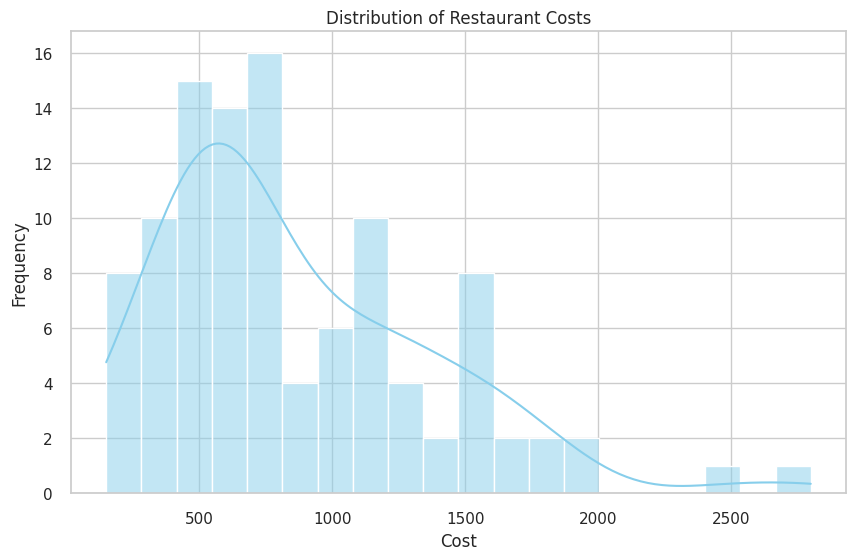

In [460]:
# Plotting the distribution of restaurant costs
plt.figure(figsize=(10, 6))
sns.histplot(zom_rest_name_df['Cost'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen for the 'Cost' variable because it is suitable for visualizing the distribution of numeric data, helping to understand the frequency and pattern of restaurant costs. The inclusion of a kernel density estimate provides a smoothed representation for additional insights.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that most restaurants have lower costs, forming a right-skewed distribution. However, two outliers stand out with significantly higher costs, possibly representing premium or luxury dining establishments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* **Affordable Options Dominant:** The insight that most restaurants have lower costs could attract a larger customer base, as affordability is often a positive factor for consumers. This may contribute to increased customer traffic and revenue.

* **Premium Options Stand Out:** The presence of higher-cost outliers could appeal to a niche market seeking premium dining experiences. Capitalizing on these high-end offerings might lead to increased revenue per customer and potentially attract a more affluent clientele.

**Potential Negative Growth:**

* **Limited Appeal for High-Cost Outliers:** Depending on the target market and local economic conditions, the presence of high-cost outliers might limit the customer base for those specific restaurants. If the majority of customers prefer affordable options, these outliers may struggle to attract a sustainable customer base, potentially leading to negative growth for those particular establishments.

It's crucial to consider the local market dynamics, customer preferences, and competition when interpreting insights. What might be a positive impact in one context could pose challenges in another. The business should align its strategies with the identified customer preferences and market demands to maximize positive impact and mitigate potential negative consequences.

#### Chart - 2: The distribution of restaurant names

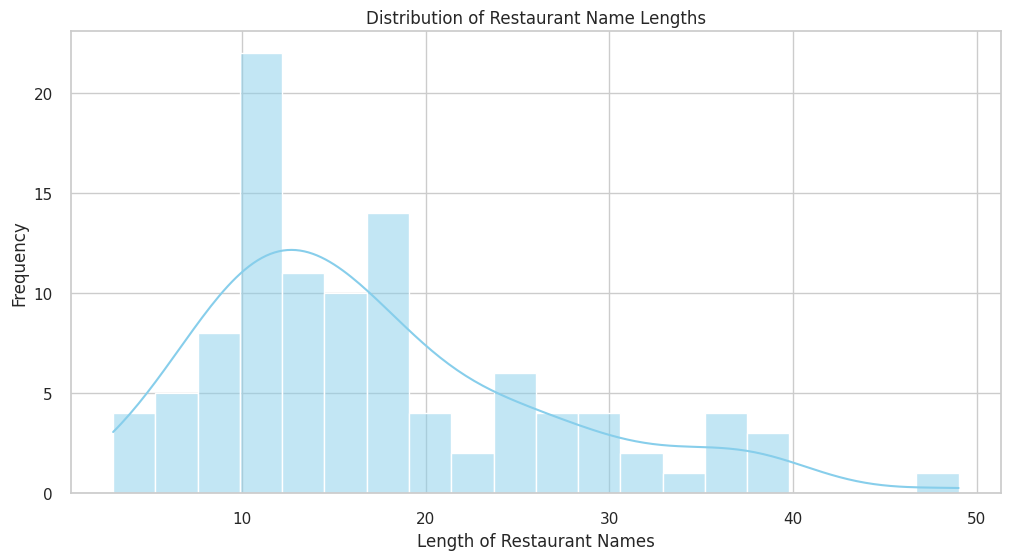

In [461]:
# Plotting the distribution of restaurant names
plt.figure(figsize=(12, 6))
sns.histplot(zom_rest_name_df['Restaurant'].str.len(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Name Lengths')
plt.xlabel('Length of Restaurant Names')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen for the distribution of restaurant name lengths because it effectively visualizes the quantitative nature of the data. It allows for easy identification of patterns and insights into the distribution of name lengths. The inclusion of a kernel density estimate enhances the visualization by providing a smoothed representation of the distribution.

##### 2. What is/are the insight(s) found from the chart?

The right-skewed distribution suggests that most restaurant names are shorter, indicating a common naming convention favoring conciseness. Longer names, although less frequent, may signify creativity or specificity among certain restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact:**

* **Memorable Short Names:** The insight that most restaurant names are shorter can be advantageous as shorter names are often more memorable. This could contribute to increased brand recall and customer engagement, potentially leading to positive business impact.

* **Consistent Naming Conventions:** If there's a common naming convention favoring shorter names, it may result in a cohesive and consistent brand image. This consistency can positively impact marketing efforts and customer perception.

**Potential Negative Growth:**

* **Limitations of Longer Names:** While longer names may indicate creativity, they might pose challenges in terms of memorability and ease of communication. If customers find longer names cumbersome or difficult to remember, it could lead to negative growth for those specific restaurants.

* **Market Adaptation:** If the naming convention in the dataset doesn't align with local market preferences, it might affect the overall appeal of the restaurants. Adapting to local preferences is crucial for positive business impact.

It's essential for businesses to assess their target audience, local market dynamics, and competitive landscape when interpreting insights. While certain insights may have positive implications, others may need careful consideration and adaptation to ensure they contribute to overall business success.

#### Chart - 3: The number of restaurants in each collection

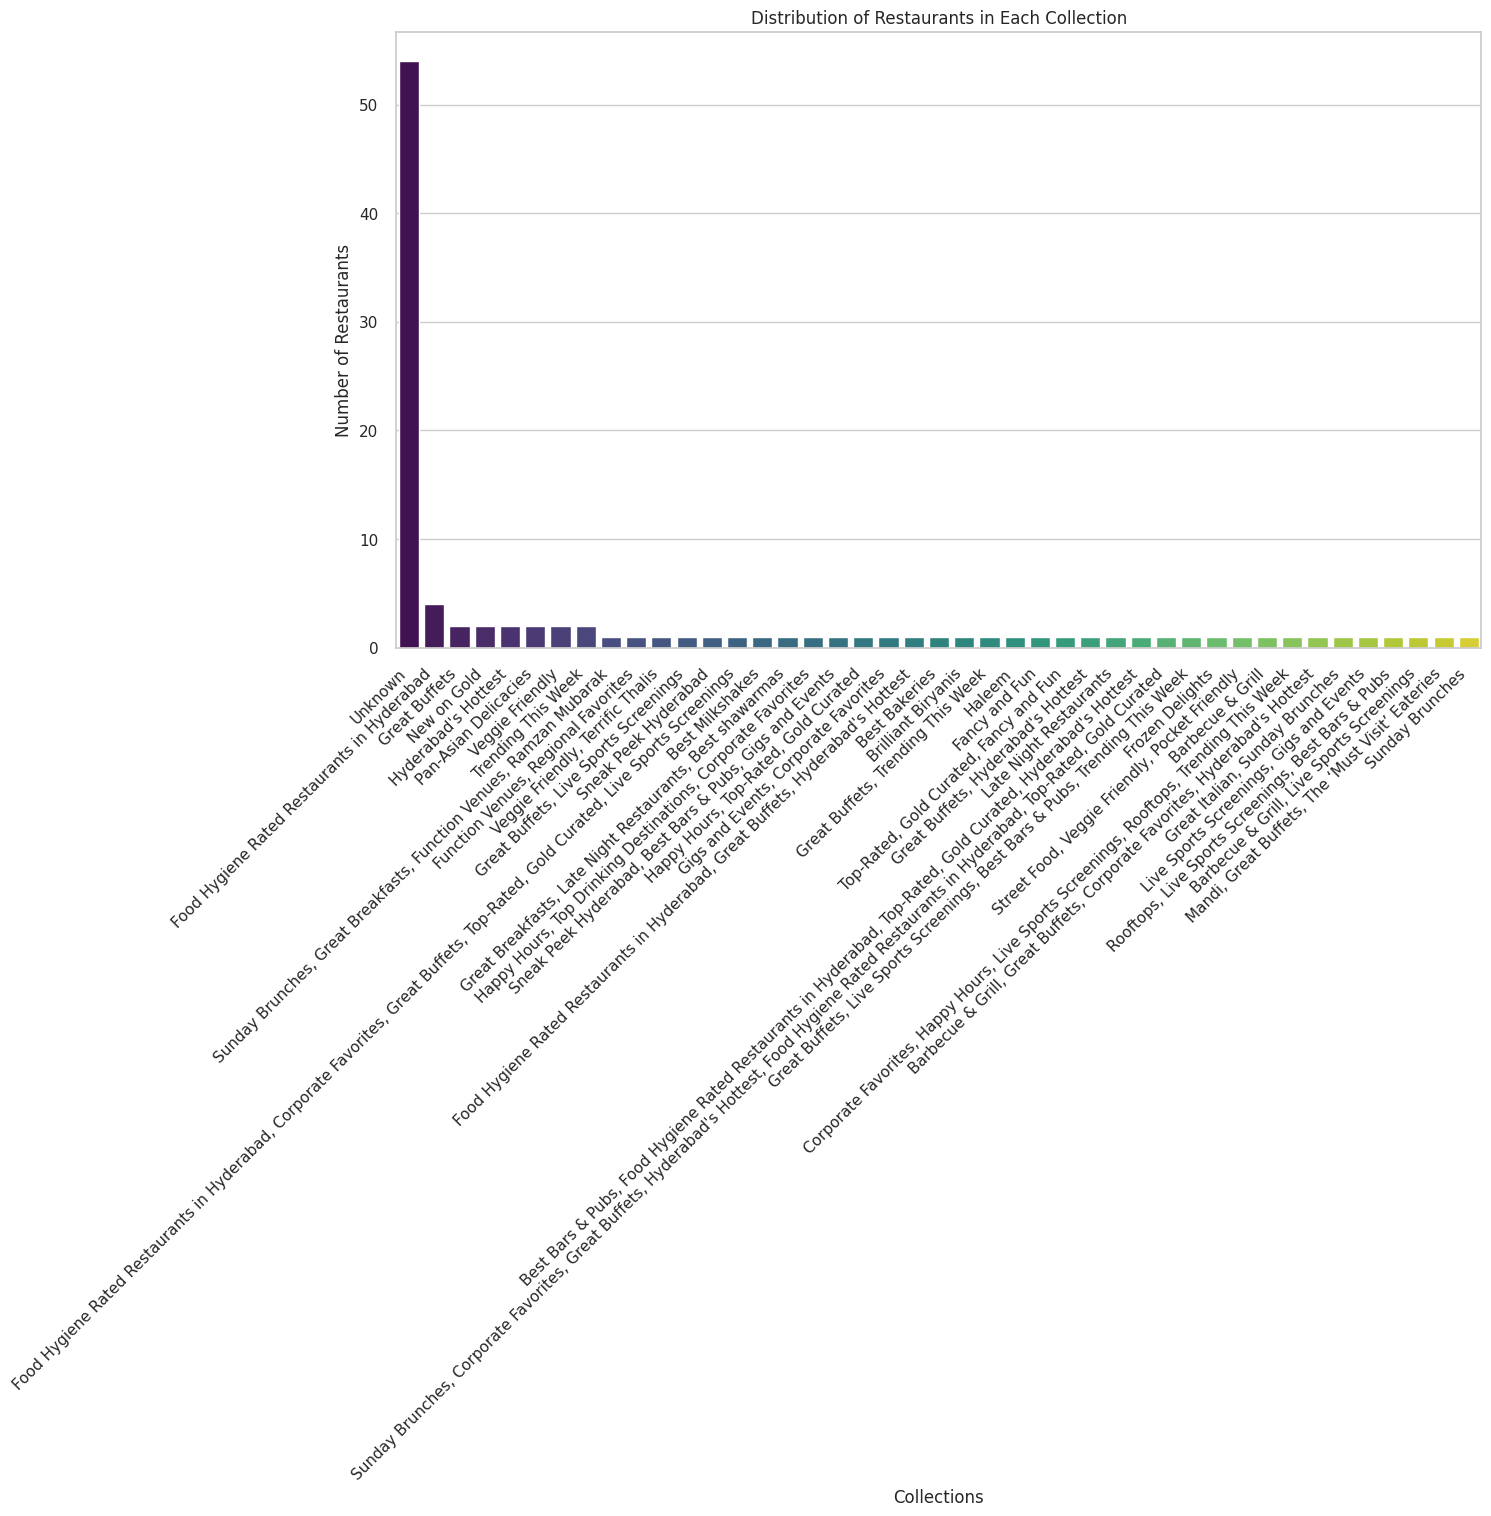

In [462]:
# Count the number of restaurants in each collection
collection_counts = zom_rest_name_df['Collections'].value_counts()

# Plotting the distribution of restaurants in each collection
plt.figure(figsize=(14, 8))
sns.barplot(x=collection_counts.index, y=collection_counts.values, palette='viridis')
plt.title('Distribution of Restaurants in Each Collection')
plt.xlabel('Collections')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart was chosen for the Collections Distribution because it effectively compares the count of restaurants in each collection, providing a clear visual representation of the distribution of categorical data. The choice is based on the categorical nature of the variable and the need to show the frequency of each collection in a readable and interpretable format.

##### 2. What is/are the insight(s) found from the chart?


**Insights from Collections Distribution:**

**1. Dominant "Unknown" Collection:**

* A significant number of restaurants have an "Unknown" collection, indicating a potential data gap or inconsistency.

**2. Specialized Offerings:**

* Collections highlight specific features like hygiene ratings, buffets, and cuisine types, showcasing diverse culinary offerings.

**3. Marketing Strategies:**

* Collections like "New on Gold" and "Trending This Week" suggest marketing strategies to promote new and trending restaurants.

**4. Diverse Venues:**

* Collections cater to various preferences, from function venues to bars, reflecting a diverse range of restaurant types.

**5. Hyderabad-Specific Themes:**

* Collections referencing Hyderabad indicate a focus on local preferences and trends.

**6. Gold Curated:**

* Presence of "Gold Curated" suggests the inclusion of restaurants in loyalty programs, potentially influencing customer choices.

**7. Culinary Themes:**

* Specific culinary themes like biryanis, barbecue, and Italian cuisine showcase the diversity of available cuisines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact:**

**1. Effective Marketing Strategies:**

Insights into strategies like "Trending This Week" and "New on Gold" can boost customer acquisition and engagement.

**2. Specialized Offerings:**

Highlighting offerings like "Great Buffets" can enhance customer satisfaction and loyalty.

**3. Diverse Venues:**

Offering diverse venues caters to various preferences, potentially increasing customer base and satisfaction.

**4. Gold Curated Program:**

Inclusion in a "Gold Curated" program may attract premium-seeking customers, increasing spend and loyalty.

**Potential Negative Growth:**

**1. Dominant "Unknown" Collection:**

The prevalence of "Unknown" collections may hinder targeted marketing and lead to missed opportunities, potentially resulting in negative growth.

**2. Incomplete Data:**

Incomplete or inaccurate data may hinder effective marketing and result in customer dissatisfaction, leading to negative growth.

**3. Culinary Themes:**

Relying heavily on certain culinary themes may limit appeal, potentially leading to negative growth if a diverse customer base is not attracted.

#### Chart - 4: Word cloud and bar chart to visualize the most popular cuisines.

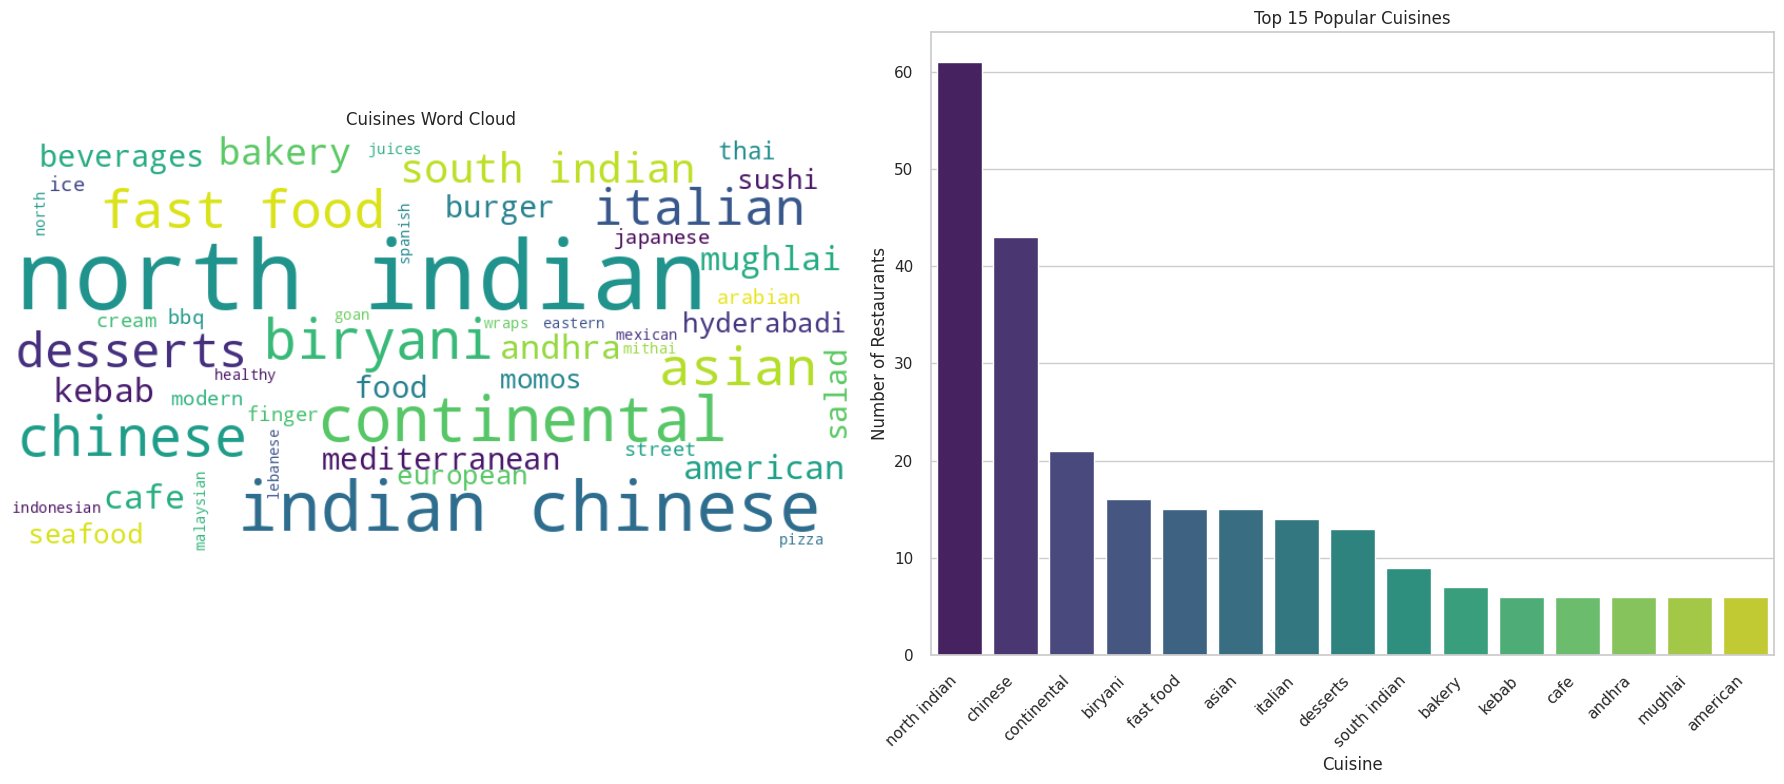

In [463]:
# Combine all cuisines into a single string
all_cuisines = ' '.join(zom_rest_name_df['Cuisines'].astype(str).str.lower())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cuisines)

# Plot the word cloud
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Cuisines Word Cloud')

# Split and count the individual cuisines
cuisine_counts = zom_rest_name_df['Cuisines'].str.lower().str.split(', ').explode().value_counts()

# Plot the bar chart
plt.subplot(1, 2, 2)
sns.barplot(x=cuisine_counts.head(15).index, y=cuisine_counts.head(15).values, palette='viridis')
plt.title('Top 15 Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Word Cloud:**

* **Nature of Data:** Visualizes the diversity of cuisines data with varying font sizes based on frequency.

* **Insights:** Intuitively explores the variety and prevalence of different cuisines.

**Bar Chart:**

* **Nature of Data:** Represents the frequency of each cuisine category in a straightforward manner.

* **Insights:** Allows for direct comparison and identifies the top cuisines quantitatively.

**Combined Approach:**

* **Comprehensive View:** Word cloud and bar chart together provide a holistic and visually appealing exploration of the cuisines distribution.
* **Insights:** Reveals both the diversity and the top cuisines within the dataset.

##### 2. What is/are the insight(s) found from the chart?

**Insights from Cuisines Distribution:**

**1. Dominant Cuisines:**

* North Indian and Chinese: Most prevalent, with North Indian cuisine being the most dominant.

**2. Diverse Offerings:**

* Continental, Biryani, Fast Food, Asian, Italian: Reflect a diverse range of culinary offerings.

**3. Regional Specialties:**

* South Indian, Andhra, Hyderabadi: Highlight regional specialties and local flavors.

**4. Global Cuisine Presence:**

* American, Mediterranean, European, Sushi, Thai: Indicates an international culinary influence and diverse taste preferences.

**5. Specialized Categories:**

* Desserts, Bakery, Kebab, Cafe, Momos, Seafood: Cater to specific preferences and occasions.

**6. Moderate Presence:**

* Japanese, Arabian, Ice Cream, Street Food, BBQ: Indicates a moderate, niche presence.

**7. Less Common Cuisines:**

* Modern Indian, North Eastern, Mithai, Indonesian, Juices: Represent less common, potentially niche choices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Business Impact:**

**1. Popular Cuisines Attraction:**

* Leveraging popular cuisines like North Indian and Chinese can attract a broader customer base, positively impacting footfall and revenue.

**2. Diverse Offerings Appeal:**

* Offering a diverse range of cuisines caters to varied preferences, potentially attracting a larger audience and enhancing overall customer satisfaction.

**3. Specialized Categories Advantage:**

* Highlighting specialized categories creates a unique selling proposition, attracting customers seeking specific culinary experiences and contributing to positive growth.

**4. Regional Specialties Recognition:**

* Emphasizing regional specialties aligns with local preferences, potentially fostering positive customer sentiment and loyalty.

**Considerations Leading to Negative Growth:**

**1. Overemphasis on Niche Cuisines:**

* Overemphasizing less common cuisines without understanding local demand may lead to negative growth due to limited customer appeal.

**2. Failure to Understand Regional Preferences:**

* Ignoring or misinterpreting regional preferences may result in dissatisfaction and negative growth in specific markets.

**3. Monotony in Dominant Cuisines:**

* Relying solely on dominant cuisines without offering variety may lead to customer boredom and reduced loyalty, impacting growth negatively.

**4. Ineffective Marketing of Specialized Categories:**

* Poor marketing of specialized categories may result in missed opportunities, negatively affecting growth potential within specific customer segments.

#### Chart - 5: Distribution of Restaurant Timings

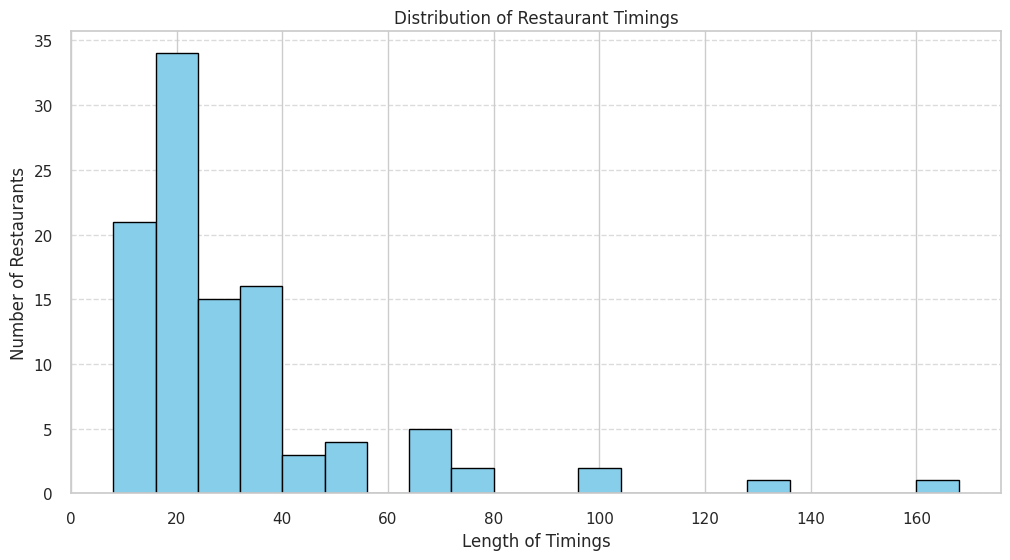

In [464]:
# Extracting the length of the timings
zom_rest_name_df['Timings_Length'] = zom_rest_name_df['Timings'].str.len()

# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.hist(zom_rest_name_df['Timings_Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Restaurant Timings')
plt.xlabel('Length of Timings')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

The decision to use a bar chart for the visualization of restaurant timings' lengths is driven by its effectiveness in conveying the count distribution of different lengths. Bar charts are known for their clarity in presenting frequency data, making them an optimal choice for showcasing the varying counts of restaurants with specific timing lengths. This visual representation facilitates a straightforward and accessible comparison of the distribution, providing a clear insight into the prevalence of different timing durations across the dataset.

##### 2. What is/are the insight(s) found from the chart?


**Insights from Right-Skewed Bar Chart:**

* The tallest bar at 20 on the x-axis indicates a prevalent length for restaurant timings, suggesting a common or standard format.

* The right-skewed distribution implies fewer variations in the number of characters, indicating adherence to a specific format for timings.

* Concentration around 20 characters suggests a potential default or standardized format for displaying restaurant timings.

* Restaurants with timings significantly different from the peak may represent outliers or less common cases, warranting further investigation.

These insights reveal patterns in the lengths of restaurant timings, emphasizing a common format while identifying potential outliers that may require closer examination.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Business Impact:**

**Positive Impact:**

1. **Standardized Timings:** If the prevalent length around 20 characters represents a standardized or common format for displaying timings, adhering to this format can enhance customer understanding and ease of information retrieval, leading to a positive impact on user experience.

**Negative Impact:**

1. **Limited Flexibility:** If the right-skewed distribution indicates a lack of flexibility in presenting timings, it might limit the ability to convey nuanced information about operating hours, potentially leading to negative growth as customers may prefer more detailed and informative timing descriptions.

2. **Outliers Management:** The presence of outliers may indicate unconventional timing formats. Failing to address these outliers or understand the reasons behind their deviations could lead to negative growth, as inconsistencies in conveying timing information may confuse or deter potential customers.

3. **Industry Standards:** If the observed standardization aligns with industry norms, it could positively impact the business. However, if it diverges significantly, there may be a negative impact as customers might find the presentation less intuitive or aligned with their expectations.

**Overall Consideration:**

* **Balancing Standardization and Flexibility:** Striking a balance between a standardized approach for clarity and flexibility to accommodate various timing formats is crucial. Adapting to industry standards while catering to customer preferences is key for positive business impact.

#### Chart - 6: Distribution of Ratings

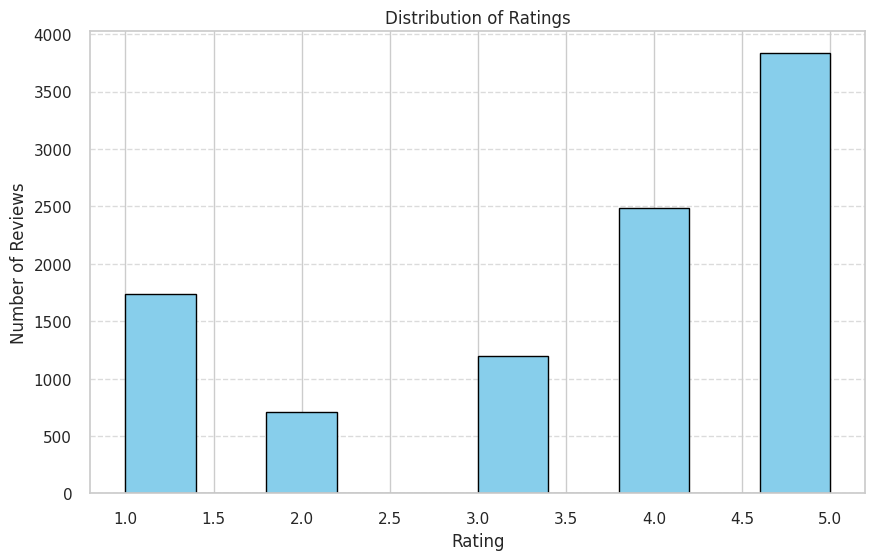

In [465]:
ratings_column = 'Rating'

# Check and convert the 'Rating' column to numeric if it's not already
zom_rest_review_df[ratings_column] = pd.to_numeric(zom_rest_review_df[ratings_column], errors='coerce')

# Drop rows with NaN values in the 'Rating' column
zom_rest_review_df = zom_rest_review_df.dropna(subset=[ratings_column])

# Round and convert float ratings to integers
zom_rest_review_df[ratings_column] = zom_rest_review_df[ratings_column].round().astype(int)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(zom_rest_review_df[ratings_column], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram for the distribution of ratings because it effectively displays the frequency of ratings in different bins, offering insights into the spread of ratings, summary statistics, and easy interpretation. Its simplicity and ability to reveal patterns make it suitable for showcasing the overall distribution of numerical data.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1. **Dominant Rating:** Majority of reviews have a rating of 5, indicating a prevalent positive sentiment and overall satisfaction.

2. **Positive Sentiment:** Concentration at higher ratings (4 and 5) suggests a positive sentiment dominating the reviews.

3. **Distribution Shape:** Right-skewed distribution implies more high ratings compared to lower ratings.

4. **Moderate and Lower Ratings:** Presence of reviews with ratings 3 and below indicates areas for potential improvement or specific issues.

5. **Review Volume:** Varying bar heights reflect review volume at different ratings, with a substantial number at 4.

6. **Engagement Levels:** The chart provides insights into customer engagement at different rating levels, highlighting areas of interest for further analysis and improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1. **Enhanced Satisfaction:** Recognizing positive sentiment (rating of 5) informs strategies to maintain and improve customer satisfaction.

2. **Strengths Identification:** Dominant positive sentiment highlights key strengths, allowing businesses to capitalize on successful aspects.

3. **Targeted Improvement:** Insights into moderate and lower ratings present opportunities for focused improvements, addressing specific customer concerns.

4. **Informed Decision-Making:** Detailed analysis guides informed decision-making on resource allocation and strategic initiatives.

**Considerations for Negative Growth:**

1. **Risk of Negative Reviews:** Unresolved issues in lower ratings may lead to more negative reviews, impacting overall reputation.

2. **Competitive Disadvantage:** Failure to address concerns may result in a competitive disadvantage, with competitors attracting dissatisfied customers.

3. **Customer Churn Risk:** Unresolved issues pose a risk of customer churn, as dissatisfied customers may choose competitors offering a better experience.

4. **Missed Opportunities:** Neglecting areas for improvement may lead to missed business opportunities and hinder innovation, affecting overall growth.

#### Chart - 7: Distribution of Reviews Over Time

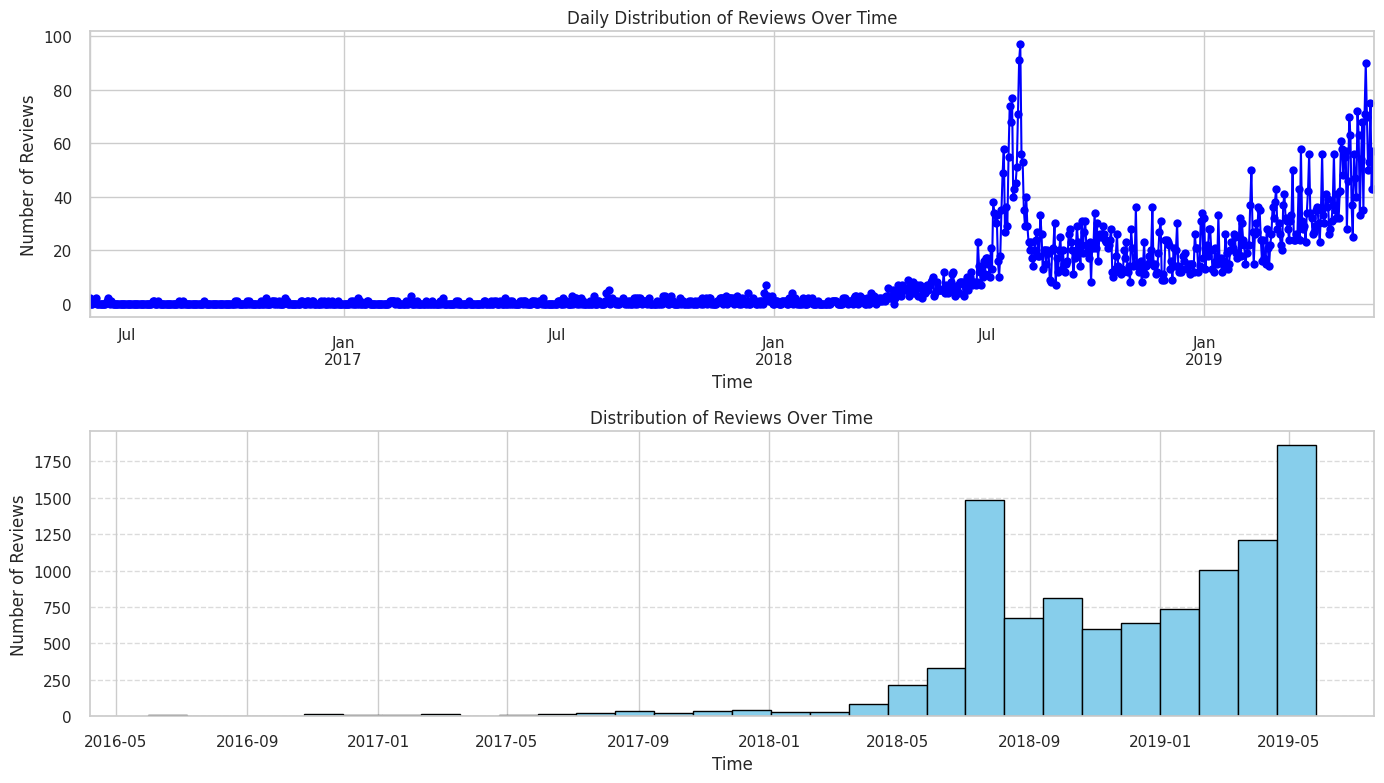

In [466]:
# Convert 'Time' column to datetime format
zom_rest_review_df['Time'] = pd.to_datetime(zom_rest_review_df['Time'])

# Set 'Time' as the index for time-based analysis
zom_rest_review_df.set_index('Time', inplace=True)

# Resample data to daily frequency and count the number of reviews per day
reviews_per_day = zom_rest_review_df.resample('D').size()

# Plotting the line chart
plt.figure(figsize=(14, 8))

# Line chart for time trends
plt.subplot(2, 1, 1)
reviews_per_day.plot(color='blue', marker='o')
plt.title('Daily Distribution of Reviews Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.grid(True)

# Histogram for time distribution
plt.subplot(2, 1, 2)
plt.hist(zom_rest_review_df.index, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Reviews Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Line Chart for Time Trends:**

* A line chart is effective for visualizing trends over time. It helps in identifying patterns, seasonality, or any notable changes in the number of reviews over different time periods. The upward or downward trend can provide insights into the overall review activity.

**Histogram for Time Distribution:**

* A histogram is suitable for displaying the distribution of events within specific time intervals. It provides a clear view of when most reviews are concentrated.

By using both charts, we get a comprehensive understanding of both the temporal trends and the distribution of reviews over time. The line chart gives a sense of how the overall review activity evolves, while the histogram provides insights into specific time intervals with higher or lower review frequencies.

##### 2. What is/are the insight(s) found from the chart?

Insights:

**1. Left-Skewed Distribution (2016-05 to 2019-05):**

* Majority of reviews occurred in the earlier period, indicating the platform's growth and popularity during that time.

**2. Significant Spike in July 2018:**

* Sharp increase in reviews during July 2018 suggests a noteworthy event or promotion that led to heightened user activity.

**3. Subsequent Drop and Gradual Recovery:**

* Following the peak in July 2018, a drop in reviews occurred, followed by a slow recovery. The drop indicates the temporary nature of the surge.

**4. Seasonal or Event-Driven Patterns:**

* Fluctuations may be influenced by seasonal or event-driven patterns, with potential impact on user behavior.

**5. Strategic Insights for Businesses:**

* Businesses can analyze trends to identify successful strategies during peak periods, informing future marketing efforts and business planning.

**6. User Engagement Optimization:**

* Understanding user engagement dynamics helps businesses optimize strategies and adapt to changing patterns, improving overall effectiveness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Understanding user engagement dynamics is crucial for positive impact. Insights from the July 2018 surge enable strategic planning and replication of successful strategies. Recognizing peak engagement times allows targeted marketing, enhancing positive outcomes. Adapting to changing user behavior ensures relevance, meeting expectations, and sustaining growth.

**Considerations for Negative Growth:**

Dependency on temporary factors, like the one-time surge, poses a risk of negative growth if not addressed. Prolonged low engagement periods may result in user disinterest. Failure to adapt strategies to evolving user behavior and unidentified causes of fluctuations can hinder growth. Regular analysis and adaptability are essential for navigating challenges and maintaining positive business impact.

#### Chart - 8: Distribution of the Cost of Restaurants Against Their Ratings

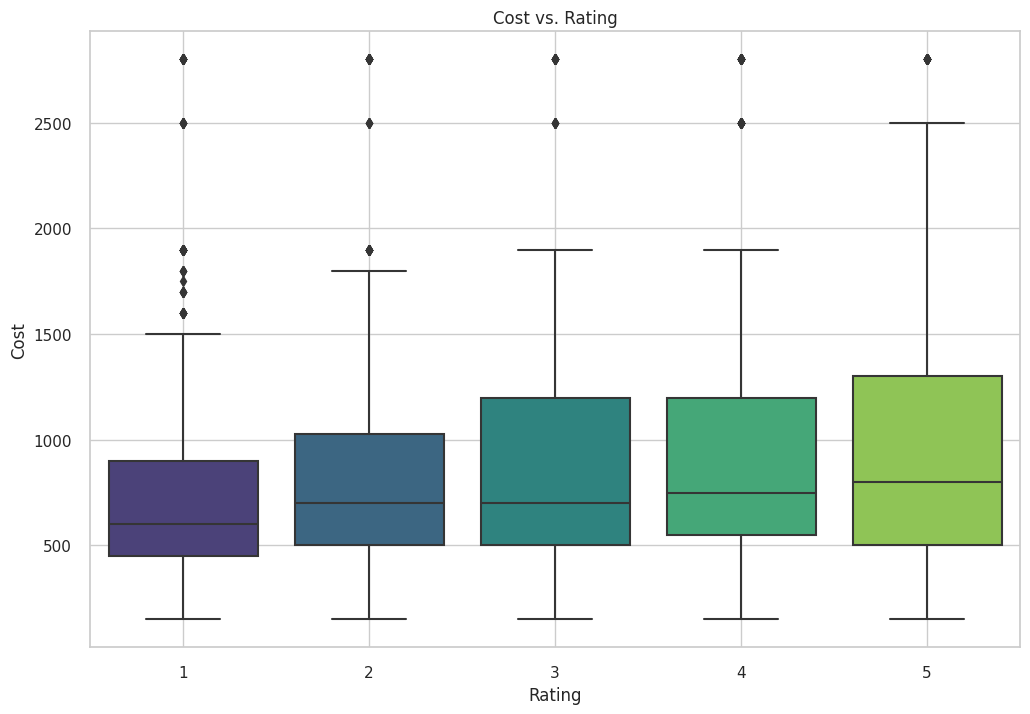

In [469]:
# Merge the two DataFrames on the common key 'Name'
merged_df = pd.merge(zom_rest_name_df, zom_rest_review_df, on='Restaurant', how='inner')

# Assuming 'Cost' is a numerical column and 'Rating' is a categorical column
numerical_column = 'Cost'
categorical_column = 'Rating'

# Boxplot for Numerical - Categorical Analysis
plt.figure(figsize=(12, 8))
sns.boxplot(x=categorical_column, y=numerical_column, data=merged_df, palette='viridis')
plt.title(f'{numerical_column} vs. {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The box plot was chosen for its effectiveness in visually representing the distribution of restaurant costs across different ratings. It provides a concise summary of key statistics, handles outliers well, facilitates easy comparison between categories, and is widely recognized for its interpretability. Additionally, it complements the analysis by offering a clear overview of the cost distribution for each rating category.

##### 2. What is/are the insight(s) found from the chart?

The summary statistics reveal a trend of increasing mean and median costs with higher ratings, suggesting that higher-rated restaurants generally have higher costs. There is growing variability in costs within higher ratings, with consistent median costs in the top three rating categories. Rating 1 stands out with lower and more consistent costs. The wider interquartile range in higher ratings implies potential outliers with exceptionally high costs in those categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

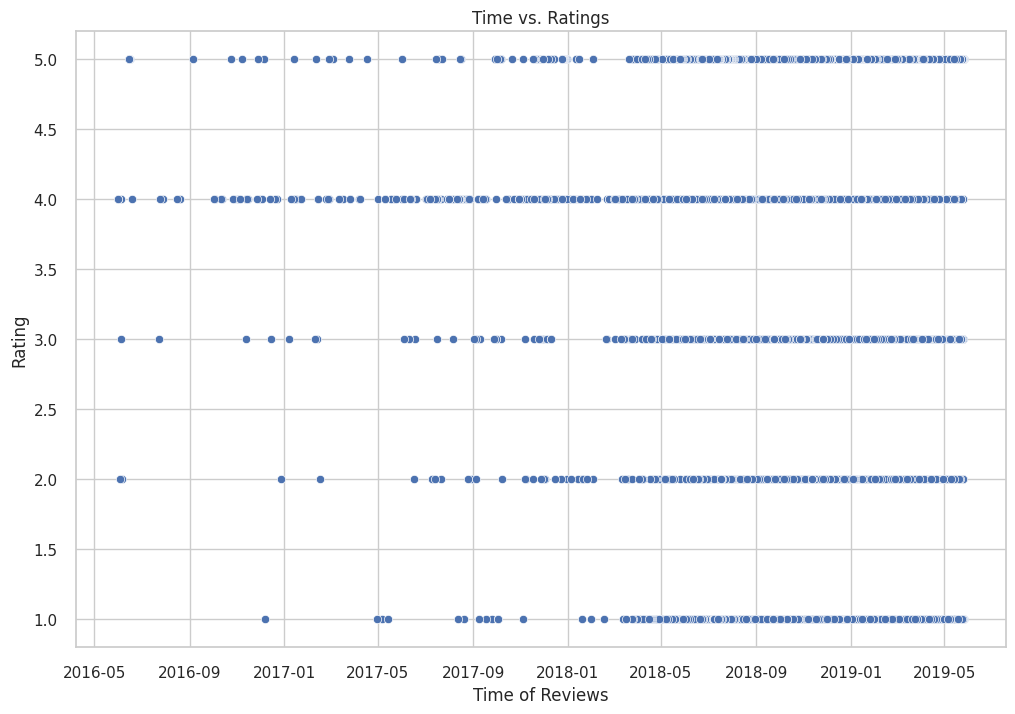

In [474]:
# Scatter plot for Time vs. Ratings
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Time', y='Rating', data=zom_rest_review_df, palette='viridis')
plt.title('Time vs. Ratings')
plt.xlabel('Time of Reviews')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
def remove_outlier(df, column):
    plt.figure(figsize=(12, 4))

    # Subplot 1: Boxplot before removing outliers
    plt.subplot(1, 2, 1)
    plt.title('Data before removing outliers')
    sns.boxplot(x=df[column])

    # Subplot 2: Distribution plot before removing outliers
    plt.subplot(1, 2, 2)
    sns.histplot(df[column], kde=True)
    plt.title('Distribution plot before removing outliers')
    plt.show()

    # Calculate the interquartile range (IQR)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers and display the modified dataframe
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Subplot 1: Boxplot before removing outliers
    plt.subplot(1, 2, 1)
    plt.title('Data after removing outliers')
    sns.boxplot(x=df[column])

    # Subplot 2: Distribution plot before removing outliers
    plt.subplot(1, 2, 2)
    sns.histplot(df[column], kde=True)
    plt.title('Distribution plot after removing outliers')
    plt.show()

remove_outlier(zom_rest_name_df,'Cost')

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***